In [38]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


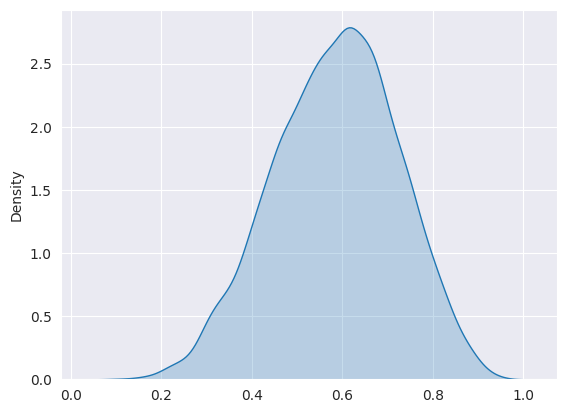

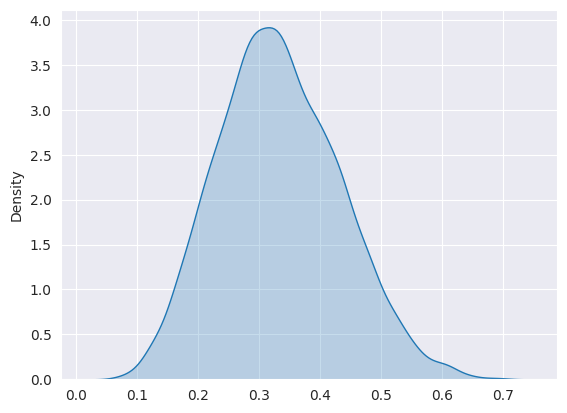

"\nCool! Now you see what simulate_beta_posterior() is doing: based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. Let's move on to A/B testing!\n"

In [39]:
# exercise 01

"""
Simulate beta posterior

In the upcoming few exercises, you will be using the simulate_beta_posterior() function you saw defined in the last video. In this exercise, you will get a feel for what the function is doing by carrying out the computations it performs.

You are given a list of ten coin tosses, called tosses, in which 1 stands for heads, 0 for tails, and we define heads as a "success". To simulate the posterior probability of tossing heads, you will use a beta prior. Recall that if the prior is Beta(a,b)
, then the posterior is Beta(X,y), with:

X = NumberOfHeads + a
y = NUmberOfTosses - NumberOfHeads + b

"""

# Instructions

"""

    Set both prior parameters, beta_prior_a and beta_prior_b, to 1.
    Calculate the number of heads and assign it to num_successes.
    Generate posterior draws according to the formula above and assign the result to posterior_draws.
---
    Set the prior parameters, beta_prior_a and beta_prior_b, to 1 and 10, respectively.
    Calculate the number of heads and assign it to num_successes.
    Generate posterior draws according to the formula above and assign the result to posterior_draws.

"""

# solution

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

tosses = np.array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)
plt.show()

#----------------------------------#

# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 10
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, fill=True)
plt.show()


#----------------------------------#

# Conclusion

"""
Cool! Now you see what simulate_beta_posterior() is doing: based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. Let's move on to A/B testing!
"""

In [40]:
import pandas as pd

ads = pd.read_csv(path_data+'ads.csv')
ads.head()

,user_id,product,site_version,time,banner_clicked
0,f500b9f27ac611426935de6f7a52b71f,clothes,desktop,2019-01-28 16:47:08,0
1,cb4347c030a063c63a555a354984562f,sneakers,mobile,2019-03-31 17:34:59,0
2,89cec38a654319548af585f4c1c76b51,clothes,mobile,2019-02-06 09:22:50,0
3,1d4ea406d45686bdbb49476576a1a985,sneakers,mobile,2019-05-23 08:07:07,0
4,d14b9468a1f9a405fa801a64920367fe,clothes,mobile,2019-01-28 08:16:37,0


In [41]:
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
    num_successes = np.sum(trials)
    return np.random.beta(num_successes + beta_prior_a, 
                          len(trials) - num_successes + beta_prior_b, 
                          10000)

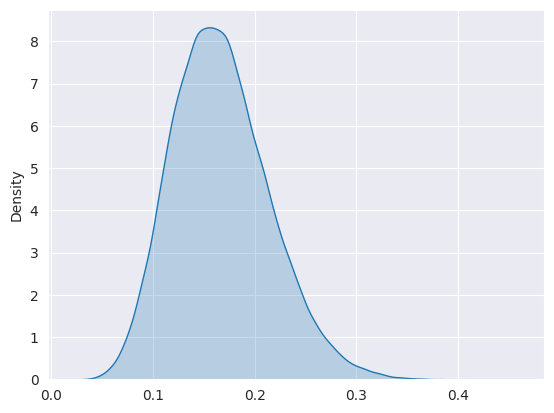

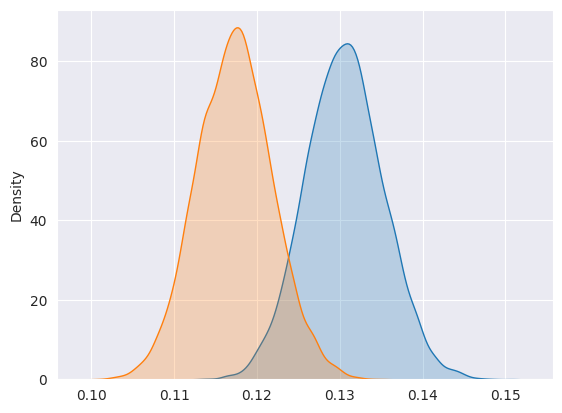

"\nCorrect, that's false! We cannot be sure about it, since the two posteriors overlap, so it is actually possible for the sneakers campaign to be bettter. But how likely is it? Let's find out in the next exercise!\n"

In [42]:
# exercise 02

"""
Posterior click rates

After a successful career episode at the Department for Health, you switch to marketing. Your new company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Your job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience.

You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, you conclude that

would be a good prior for the click-through rate.

The ads data, the simulate_beta_posterior() function you saw in the video, and numpy (as np) are available in your workspace.
"""

# Instructions

"""

    Simulate 100000 draws from the prior distribution, assigning the result to prior_draws.
    Plot the density of prior_draws to make sure it reflects your prior knowledge about the click-through rate.
---

    Take the banner_clicked column from ads for the rows where product is clothes, and assign the results to clothes_clicked.
    Take the banner_clicked column from ads for the rows where product is sneakers, and assign the results to sneakers_clicked.
---

    Generate draws from the two posteriors (one for clothes, one for sneakers) using the simulate_beta_posterior() function and assign them to clothes_posterior and sneakers_posterior, respectively.
---
Question

You can run the following code snippet to plot the two posteriors.

sns.kdeplot(clothes_posterior, shade=True, label="clothes")
sns.kdeplot(sneakers_posterior, shade=True, label="sneakers")
plt.show()

Based on the plot, which of the statements is false about the clothes and sneakers advertising campaigns?
[Clothes ads are sure to be doing better than snearker ads](Answer)
"""

# solution

# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, fill=True, label="prior")
plt.show()

# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads["product"] == "clothes"]["banner_clicked"]
sneakers_clicked = ads.loc[ads["product"] == "sneakers"]["banner_clicked"]

# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

#----------------------------------#

sns.kdeplot(clothes_posterior, fill=True, label="clothes")
sns.kdeplot(sneakers_posterior, fill=True, label="sneakers")
plt.show()

# Conclusion

"""
Correct, that's false! We cannot be sure about it, since the two posteriors overlap, so it is actually possible for the sneakers campaign to be bettter. But how likely is it? Let's find out in the next exercise!
"""

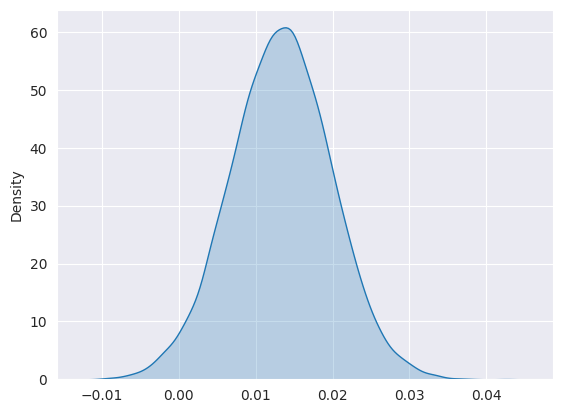

[0.00314017 0.02458363]
0.9776


"\nWell done! Take a look at the posterior density plot of the difference in click rates: it is very likely positive, indicating that clothes are likely better. The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better! How great is that risk? Let's find out!\n"

In [43]:
# exercise 03

"""
A or B, and how sure are we?

You have just discovered that clothes ads are likely to have a higher click ratio than sneakers ads. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between clothes and sneakers click rates. Then, you will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, you will calculate the percentage of cases where this difference is positive, which corresponds to clothes click rate being higher. Let's get on with it!

arviz, seaborn, and matplotlib.pyplot have been imported for you as az, sns, and plt, respectively. Also, clothes_posterior and sneakers_posterior which you have calculated in the previous exercise are available in your workspace.
"""

# Instructions

"""

    Calculate the posterior difference in click rates between clothes and sneakers ads and assign it to diff.
---

    Calculate the 90% HPD credible interval of the posterior difference, assign it to interval, and print it.
---

    Calculate the probability that the posterior difference is positive and assign it to clothes_better_prob.
"""

# solution

import arviz as az

# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, fill=True, label="diff")
plt.show()

# Calculate and print 90% credible interval of posterior difference
interval = az.hdi(diff, hdi_prob=0.9)
print(interval)

# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff > 0).mean()
print(clothes_better_prob)

#----------------------------------#

# Conclusion

"""
Well done! Take a look at the posterior density plot of the difference in click rates: it is very likely positive, indicating that clothes are likely better. The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better! How great is that risk? Let's find out!
"""

In [44]:
# exercise 04

"""
How bad can it be?

You have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads. This suggests rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign?

The answer to this is the expected loss: the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, you only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.

The posterior difference between the click rates, diff, is available in your workspace. Let's find out how much is at risk!
"""

# Instructions

"""

    Slice diff to take only cases where it is negative (corresponding to sneakers click rate being higher) and assign the result to loss.
    Calculate the average loss, assign it to expected_loss and print it.

"""

# solution

# Slice diff to take only cases where it is negative
loss = (diff[diff <0])

# Compute and print expected loss
expected_loss = loss.mean()
print(expected_loss)

#----------------------------------#

# Conclusion

"""
Terrific job! You can sefely roll out the clothes campaign to a larger audience. You are 98% sure it has a higher click rare, and even if the 2% risk of this being a wrong decision materializes, you will only lose 0.2 percentage points in the click rate, which is a very small risk!
"""

-0.0024654714096751795


'\nTerrific job! You can sefely roll out the clothes campaign to a larger audience. You are 98% sure it has a higher click rare, and even if the 2% risk of this being a wrong decision materializes, you will only lose 0.2 percentage points in the click rate, which is a very small risk!\n'

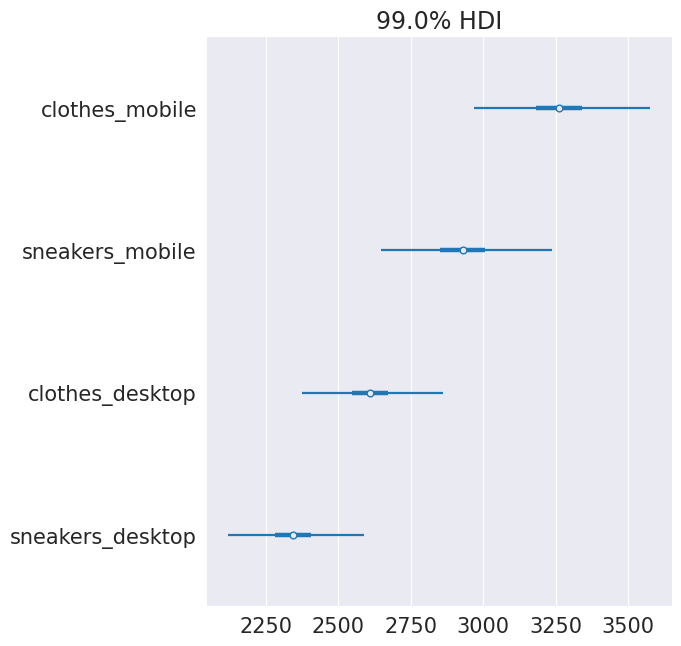

"\nYup, that's false! The ends of the whiskers mark the 99% credible interval, so there is a 1% chance the cost will fall outside of it. It's very, very unlikely, but there is a slim chance that the clothes-mobile cost will turn out lower. It's important to stay cautious when communicating possible scenarios -- that's the thing with probability, it's rarely the case that something is 'completely impossible'!\n"

In [45]:
# exercise 05

"""
Decision analysis: cost

Your journey in marketing continues. You have already calculated the posterior click rates for clothes and sneakers ads, available in your workspace as clothes_posterior and sneakers_posteriors, respectively. Your boss, however, is not interested in the distributions of click rates. They would like to know what would be the cost of rolling out an ad campaign to 10'000 users. The company's advertising partner charges $2.5 per click on a mobile device and $2 on a desktop device. Your boss is interested in the cost of the campaign for each product (clothes and sneakers) on each platform (mobile and desktop): four quantities in total.

Let's compare these four posterior costs using the forest plot from pymc3, which has been imported for you as pm.
"""

# Instructions

"""

    Calculate the distributions of the numbers of clicks for clothes and sneakers and assign the results to clothes_num_clicks and sneakers_num_clicks, respectively.
---

    Create a dictionary ads_costs with four keys: clothes_mobile, sneakers_mobile, clothes_desktop, and sneakers_sneakers, each holding the cost distribution of corresponding clicks.
---

    Draw a forestplot() of ads_costs using a 99% credible interval (the textsize argument has been added to aid plot visibility).
---
Question

Based on the plot you have just drawn, which of the following statements is false?
Possible answers

The cost estimate for the clothes campaign on mobile devices is more uncertain than the one for desktop devices.

If the goal was to reduce the costs, then going for the sneakers campaign on desktop devices would be a good decision.

It's completely impossible for the clothes-mobile cost to be lower than the sneakers-desktop cost.
"""

# solution

import pymc as pm

# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10_000
sneakers_num_clicks = sneakers_posterior * 10_000

# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks * 2.5,
    "sneakers_mobile": sneakers_num_clicks * 2.5,
    "clothes_desktop": clothes_num_clicks * 2,
    "sneakers_desktop": sneakers_num_clicks * 2,
}

# Draw a forest plot of ads_costs
pm.plot_forest(ads_costs, hdi_prob=0.99, textsize=15)
plt.show()

#----------------------------------#

# Conclusion

"""
Yup, that's false! The ends of the whiskers mark the 99% credible interval, so there is a 1% chance the cost will fall outside of it. It's very, very unlikely, but there is a slim chance that the clothes-mobile cost will turn out lower. It's important to stay cautious when communicating possible scenarios -- that's the thing with probability, it's rarely the case that something is 'completely impossible'!
"""

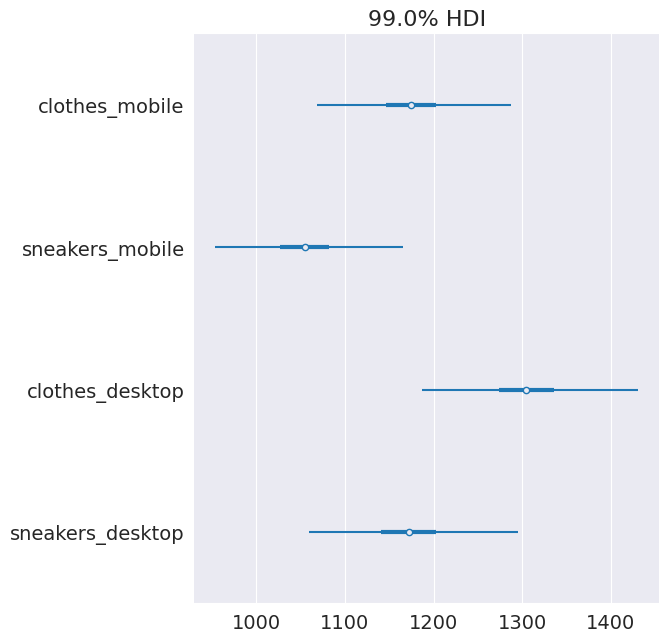

"\nWell done! Notice how shifting focus from costs to profit has changed the optimal decision. The sneakers-desktop campaign which minimizes the cost is not the best choice when you care about the profit. Based on these results, you would be more likely to invest in the clothes-desktop campaign, wouldn't you? Let's continue to the final lesson of this chapter, where we look at regression and forecasting, the Bayesian way!\n"

In [46]:
# exercise 06

"""
Decision analysis: profit

Good job translating the posterior click rates into cost distributions! In the meantime, a new company policy has been released. From now on, the goal of the marketing department is not to minimize the costs of campaigns, which was quite ineffective, but rather to maximize the profit. Can you adjust your findings accordingly, knowing that the expected revenue per click from a mobile ad is $3.4, and the one from a desktop ad is $3? To calculate the profit, you need to calculate the revenue from all clicks, then subtract the corresponding cost from it.

Everything you have calculated in the previous exercise is available in your workspace: the ads_cost dictionary as well as the number of click distributions: clothes_num_clicks and sneakers_num_clicks.
"""

# Instructions

"""

    Create a dictionary ads_profit with four keys: clothes_mobile, sneakers_mobile, clothes_desktop, and sneakers_sneakers, each holding the profit distribution from corresponding clicks.
    Draw a forest plot of ads_proft using the credible interval of 99%.

"""

# solution

# Calculate profit distributions for each product and platform
ads_profit = {
    "clothes_mobile": clothes_num_clicks * 3.4 - ads_costs["clothes_mobile"],
    "sneakers_mobile": sneakers_num_clicks * 3.4 - ads_costs["sneakers_mobile"],
    "clothes_desktop": clothes_num_clicks * 3 - ads_costs["clothes_desktop"],
    "sneakers_desktop": sneakers_num_clicks * 3 - ads_costs["sneakers_desktop"],
}

# Draw a forest plot of ads_profit
pm.plot_forest(ads_profit, hdi_prob=0.99)
plt.show()

#----------------------------------#

# Conclusion

"""
Well done! Notice how shifting focus from costs to profit has changed the optimal decision. The sneakers-desktop campaign which minimizes the cost is not the best choice when you care about the profit. Based on these results, you would be more likely to invest in the clothes-desktop campaign, wouldn't you? Let's continue to the final lesson of this chapter, where we look at regression and forecasting, the Bayesian way!
"""

"\nCorrect, this one's false! It's actually the other way around: you are more certain about the sneakers ad's impact, which is reflected in the corresponding prior's standard deviation. It is smaller than the one for clothes, which makes the normal prior narrower and taller, indicating less uncertainty!\n"

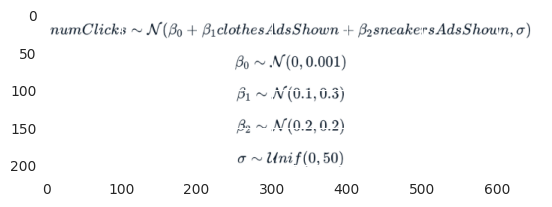

In [47]:
# exercise 07

"""
Defining a Bayesian regression model

You have been tasked with building a predictive model to forecast the daily number of clicks based on the numbers of clothes and sneakers ads displayed to the users. You decide to use Bayesian linear regression. You've defined your model as follows:

Model definition specifying the number of clicks to have a normal distribution with the mean β0 + β1 * clothes-ads-shown + β2 * sneakers-ads-shown, and some standard deviation. The prior for β0 is N(0, 001), for β1 it's N(0.1, 0.3) and for β2 it's N(0.2, 0.2).

Which of the following is false of your model?
"""

# Instructions

"""
Possible Answers

    With no ads displayed, you don't expect any clicks.
    
    
    You expect the sneakers ad to have a higher click rate than the clothes ad.
    
    
    You are more certain about your prior knowledge about the clothes ad's impact on the number of clicks than about the sneakers ad's impact. (Answer)
"""

# solution
from matplotlib import image
img = image.imread('/home/nero/Documents/Estudos/DataCamp/Python/courses/Bayesian_Data_Analysis_in_Python/reg_model_def_75.png')
plt.imshow(img)

#----------------------------------#

# Conclusion

"""
Correct, this one's false! It's actually the other way around: you are more certain about the sneakers ad's impact, which is reflected in the corresponding prior's standard deviation. It is smaller than the one for clothes, which makes the normal prior narrower and taller, indicating less uncertainty!
"""

       intercept_draws  clothes_draws  sneakers_draws     sd_draws
count      2000.000000    2000.000000     2000.000000  2000.000000
mean          1.280420       0.104594        0.103594     2.651661
std           0.903845       0.030282        0.031596     0.159491
min          -2.088446      -0.007500        0.001084     2.211899
25%           0.712354       0.085381        0.081577     2.543340
50%           1.288362       0.104680        0.103554     2.639033
75%           1.849244       0.123830        0.125466     2.754714
max           4.343638       0.229886        0.211751     3.278124


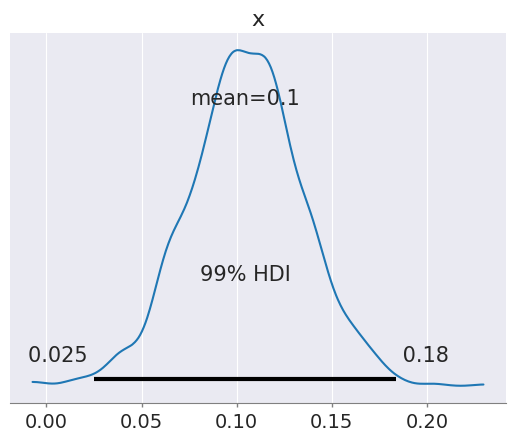

"\nWell done! Take a look at the output in the console and at the plot. The impact parameters of both clothes and sneakers look okay: they are positive, most likely around 0.1, indicating 1 additional click from 10 ad impressions, which makes sense. Let's now use the model to make predictions!\n"

In [48]:
# exercise 08

"""
Analyzing regression parameters

Your linear regression model has four parameters: the intercept, the impact of clothes ads, the impact of sneakers ads, and the variance. The draws from their respective posterior distributions have been sampled for you and are available as intercept_draws, clothes_draws, sneakers_draws, and sd_draws, respectively.

Before you make predictions with your model, it's a good practice to analyze the posterior draws visually. In this exercise, you will first take a look at the descriptive statistics for each parameter's draws, and then you will visualize the posterior distribution for one of them as an example. pymc3 and pandas have been imported for you as pm and pd, respectively. Let's take a look at the parameters draws!
"""

# Instructions

"""

    Create a DataFrame posterior_draws_df with four columns, each containing one parameter's posterior draws.
---

    Calculate the descriptive statistics of all parameters draws using the .describe() method, assign them to draws_stats, and print them.
---

    Plot the posterior density of the clothes impact parameter using the appropriate function from pymc3, setting the credible interval to 99%.

"""

# solution

# Collect parameter draws in a DataFrame
"""posterior_draws_df = pd.DataFrame({
    "intercept_draws": intercept_draws,
    "clothes_draws": clothes_draws,
  	"sneakers_draws": sneakers_draws,
    "sd_draws": sd_draws,
})"""

posterior_draws_df = pd.read_csv(path_data+'posterior_draws_df.csv')

clothes_draws = posterior_draws_df.clothes_draws.values

# Describe parameter posteriors
draws_stats = posterior_draws_df.describe()
print(draws_stats)

# Plot clothes parameter posterior
pm.plot_posterior(clothes_draws, hdi_prob=0.99)
plt.show()

#----------------------------------#

# Conclusion

"""
Well done! Take a look at the output in the console and at the plot. The impact parameters of both clothes and sneakers look okay: they are positive, most likely around 0.1, indicating 1 additional click from 10 ad impressions, which makes sense. Let's now use the model to make predictions!
"""

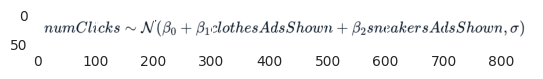

In [49]:
img = image.imread('/home/nero/Documents/Estudos/DataCamp/Python/courses/Bayesian_Data_Analysis_in_Python/num_clicks_formula.png')
plt.imshow(img)

In [50]:
# Creating arrays
intercept_draws = posterior_draws_df.intercept_draws.values
sneakers_draws = posterior_draws_df.sneakers_draws.values
sd_draws = posterior_draws_df.sd_draws.values

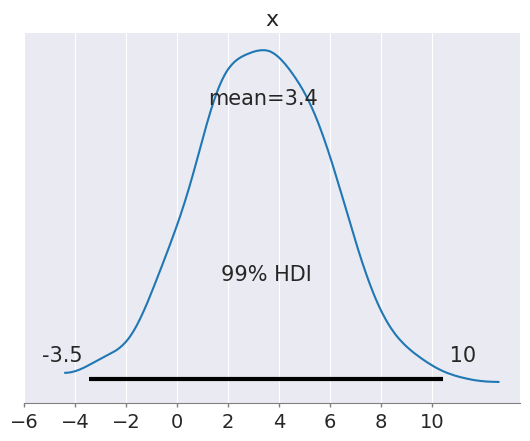

'\nGreat job! It looks like you can expect more or less three or four clicks if you show 10 clothes and 10 sneaker ads. Head off to the final chapter of the course where you will be using the pymc3 package to carry out a full-fledged Bayesian linear regression analysis - see you there!\n'

In [51]:
# exercise 09

"""
Predictive distribution

Good job analyzing the parameter draws! Let's now use the linear regression model to make predictions. How many clicks can we expect if we decide to show 10 clothes ads and 10 sneaker ads? To find out, you will have to draw from the predictive distribution: a normal distribution with the mean defined by the linear regression formula and standard deviation estimated by the model.

First, you will summarize each parameter's posterior with its mean. Then, you will calculate the mean of the predictive distribution according to the regression equation. Next, you will draw a sample from the predictive distribution and finally, you will plot its density. Here is the regression formula for your convenience:

The number of clicks has a normal distribution with the mean β0 + β1 * clothes-ads-shown + β2 * sneakers-ads-shown, and some standard deviation sigma.

pymc3, numpy, and seaborn have been imported under their usual aliases.
"""

# Instructions

"""

    Summarize each of the drawn parameters (intercept_draws, sneakers_draws, clothes_draws, and sd_draws) by its posterior mean.
---

    Calculate the mean of the predictive distribution based on the linear model, assuming you will show 10 sneaker and 10 clothes ads, and assign it to pred_mean.
---

    Plot the density of the predictive distribution using the appropriate pymc3 function and setting the credible interval to 99%.

"""

# solution

# Aggregate posteriors of the parameters to point estimates
intercept_coef = np.mean(intercept_draws)
sneakers_coef = np.mean(sneakers_draws)
clothes_coef = np.mean(clothes_draws)
sd_coef = np.mean(sd_draws)

# Calculate the mean of the predictive distribution
pred_mean = intercept_coef + sneakers_coef * 10 + clothes_coef * 10

# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)

# Plot the density of the predictive distribution
pm.plot_posterior(pred_draws, hdi_prob=0.99)
plt.xticks(range(-6, 12, 2))
plt.show()

#----------------------------------#

# Conclusion

"""
Great job! It looks like you can expect more or less three or four clicks if you show 10 clothes and 10 sneaker ads. Head off to the final chapter of the course where you will be using the pymc3 package to carry out a full-fledged Bayesian linear regression analysis - see you there!
"""